In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
import time
import datetime

In [16]:
data = pd.read_excel("C:/Users/PCC/Downloads/Nifty50 Stock Price Prediction.xlsx")

In [17]:
data.head()

,Stock Name,Date,Open,High,Low,Close,Volume,Chg%
0,Adani Enterprises Ltd.,2023-10-16,2454.55,2464.70,2421.85,2429.35,803860.0,-1.03
1,Adani Enterprises Ltd.,2023-10-13,2488.90,2495.00,2422.35,2454.55,2280000.0,-2.07
2,Adani Enterprises Ltd.,2023-10-12,2499.90,2521.75,2490.65,2506.35,1800000.0,0.71
3,Adani Enterprises Ltd.,2023-10-11,2533.90,2538.00,2482.50,2488.60,1630000.0,-0.39
4,Adani Enterprises Ltd.,2023-10-10,2443.00,2517.95,2443.00,2498.30,1770000.0,2.28


In [18]:
data.shape

(49690, 8)

In [19]:
data.isnull().sum()

Stock Name     0
Date           0
Open           0
High           0
Low            0
Close          0
Volume        35
Chg%           0
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

Stock Name    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Chg%          0
dtype: int64

In [22]:
data.shape

(49655, 8)

In [23]:
data.dtypes

Stock Name            object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Chg%                 float64
dtype: object

In [24]:
data['Date'] = pd.to_datetime(data['Date'])

In [25]:
data['Stock Name'].unique()

array(['Adani Enterprises Ltd.',
       'Adani Ports and Special Economic Zone Ltd.',
       'Apollo Hospitals Enterprises Ltd.', 'Asian Paints Ltd.',
       'Axis Bank Ltd.', 'Bajaj Auto Ltd.', 'Bajaj Finance Ltd.',
       'Bajaj Finserv Ltd.', 'Bharat Petroleum Corp. Ltd.',
       'Bharti Airtel Ltd.', 'Britannia Industries Ltd.', 'Cipla Ltd.',
       'Coal India Ltd.', "Divi's Laboratories Ltd.",
       "Dr. Reddy's Laboratories Ltd.", 'Eicher Motors Ltd.',
       'Grasim Industries Ltd.', 'HCL Technologies Ltd.',
       'HDFC Bank Ltd.', 'HDFC Life Insurance Company Ltd.',
       'Hero MotoCorp Ltd.', 'Hindalco Industries Ltd.',
       'Hindustan Unilever Ltd.', 'ICICI Bank Ltd.', 'IndusInd Bank Ltd.',
       'Infosys Ltd.', 'ITC Ltd.', 'JSW Steel Ltd.',
       'Kotak Mahindra Bank Ltd.', 'Larsen & Toubro Ltd.',
       'LTIMindtree Ltd.', 'Mahindra & Mahindra Ltd.',
       'Maruti Suzuki India Ltd.', 'Nestle India Ltd.', 'NTPC Ltd.',
       'Oil And Natural Gas Corporation Ltd.',
 

In [26]:
stock_name = 'UPL Ltd.'
qty = 1
buying_date = '2023-12-20'
selling_date = '2024-11-20'

In [27]:
new_data = data[data['Stock Name']== stock_name]

In [28]:
new_data = new_data.copy()

In [29]:
new_data['Year'] = new_data['Date'].dt.year
new_data['Month'] = new_data['Date'].dt.month
new_data['Day'] = new_data['Date'].dt.day

In [30]:
y = new_data['Close']

In [31]:
x = new_data[['Volume', 'Chg%', 'Year', 'Month', 'Day']]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [35]:
# Create linear regression model
lr = LinearRegression()

In [36]:
# Train the model
lr.fit(x_train_poly, y_train)
y_pred=lr.predict(x_test_poly)

In [37]:
y_pred

array([549.80495174, 646.21716534, 640.50405924, 569.55547851,
       583.10077263, 699.23051246, 562.61073481, 461.01615849,
       769.48283746, 572.48720995, 524.49406989, 673.07072369,
       583.44233051, 630.46960904, 737.48860178, 688.86430983,
       440.07253009, 730.13561181, 740.4927605 , 697.88640085,
       567.92391838, 685.34004525, 555.78331665, 738.68583129,
       674.85229624, 664.70999631, 730.8450658 , 692.10721489,
       536.98975026, 721.6800456 , 736.94413441, 490.04726706,
       589.63068855, 629.90469823, 685.58770034, 553.40227901,
       686.11985334, 567.22827164, 538.05623132, 680.37281491,
       740.82238453, 720.6775942 , 591.59357497, 629.1199083 ,
       688.86925298, 770.60959269, 817.74525048, 562.39330758,
       735.51357648, 630.48625434, 537.01731844, 591.33123849,
       551.97550134, 639.50511329, 549.23234585, 680.38534084,
       723.4967754 , 622.57595502, 716.47602108, 703.16182282,
       689.67875269, 639.33483776, 696.38210569, 720.89

In [38]:
y_predt=lr.predict(x_train_poly)

In [39]:
y_predt

array([590.38887606, 561.15986125, 641.4293172 , 529.05315974,
       582.18435031, 711.72957408, 678.77925774, 691.92200428,
       693.82658396, 791.57372838, 554.21264565, 502.59887201,
       640.65211594, 683.94151956, 567.56082304, 637.81259251,
       597.20199224, 551.27105921, 620.75995045, 631.96169707,
       722.76345499, 760.5589045 , 448.28070724, 738.29471891,
       683.83030813, 643.06643773, 716.55897642, 489.25358767,
       632.17591699, 561.71114871, 774.58827212, 616.1344923 ,
       731.5374224 , 761.01678423, 687.39146424, 753.43750009,
       642.81282003, 650.57534438, 706.73816217, 568.83234256,
       686.05082267, 647.45555276, 517.32770198, 748.30055828,
       735.24451451, 654.97332115, 582.59049913, 528.93172661,
       722.23325913, 696.8821014 , 752.92311021, 732.41638373,
       635.25718195, 694.01699833, 567.34478161, 613.34431153,
       676.54440815, 732.52452391, 690.81728406, 544.28597496,
       574.60933319, 521.58391998, 686.61596727, 453.93

In [40]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [41]:
print("R-squared score:", r2)
print("Adjusted R-squared score:", adj_r2)

R-squared score: 0.4303424073463692
Adjusted R-squared score: 0.41558443862477257


In [42]:
new_data['Date'] = new_data['Date'].astype(str)
new_data['Date'] = new_data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [43]:
# Convert the buying and selling dates to datetime.date objects
buying_date = datetime.datetime.strptime(buying_date, '%Y-%m-%d').date()
selling_date = datetime.datetime.strptime(selling_date, '%Y-%m-%d').date()

In [44]:
# Get the current date
today_date = datetime.date.today()

In [45]:
# Extract data for features
last_100_data = new_data.iloc[-100:]
volume_mean = np.mean(last_100_data['Volume'])
chg_mean = np.mean(last_100_data['Chg%'])
volume_std = np.std(last_100_data['Volume'])
chg_std = np.std(last_100_data['Chg%'])

buying_year = buying_date.year
buying_month = buying_date.month
buying_day = buying_date.day
selling_year = selling_date.year
selling_month = selling_date.month
selling_day = selling_date.day

# Create feature vectors for buying and selling dates
X_buying = np.array([[volume_mean, chg_mean,buying_year,buying_month,buying_day ]])
X_buying_scaled = (X_buying - [volume_mean, chg_mean, 0, 0, 0]) / [volume_std, chg_std, 1, 1, 1]
predicted_close_buying = lr.predict(poly.transform(X_buying_scaled))[-1]

X_selling = np.array([[volume_mean, chg_mean,selling_year,selling_month,selling_day ]])
X_selling_scaled = (X_selling - [volume_mean, chg_mean, 0, 0, 0]) / [volume_std, chg_std, 1, 1, 1]
predicted_close_selling = lr.predict(poly.transform(X_selling_scaled))[-1]

# Calculate profit or loss
buying_price = predicted_close_buying
selling_price = predicted_close_selling
pnl = (selling_price - buying_price) * qty

# Display the results
print('Predicted Buying price:', predicted_close_buying)
print('Predicted Selling price:', predicted_close_selling)
print('Profit/Loss:', pnl)


Predicted Buying price: 740.9820873247809
Predicted Selling price: 760.1734345977893
Profit/Loss: 19.191347273008432


c:\Users\Vishal Chauhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Vishal Chauhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [46]:
for i in ['Year','Month','Day']:
  x_test[i] = x_test[i].astype(str)

In [47]:
x_test['date'] = x_test['Year']+'-'+x_test['Month']+'-'+x_test['Day']

In [48]:
x_test

,Volume,Chg%,Year,Month,Day,date
48621,2750000.0,-4.35,2020,2,1,2020-2-1
48228,3030000.0,0.63,2021,9,2,2021-9-2
48270,2510000.0,0.99,2021,7,2,2021-7-2
48359,16690000.0,2.17,2021,2,19,2021-2-19
48618,3110000.0,2.84,2020,2,5,2020-2-5
...,...,...,...,...,...,...
48189,3450000.0,1.41,2021,10,29,2021-10-29
48154,1660000.0,3.58,2021,12,21,2021-12-21
47768,2360000.0,-0.06,2023,7,12,2023-7-12
47844,913310.0,-1.05,2023,3,20,2023-3-20


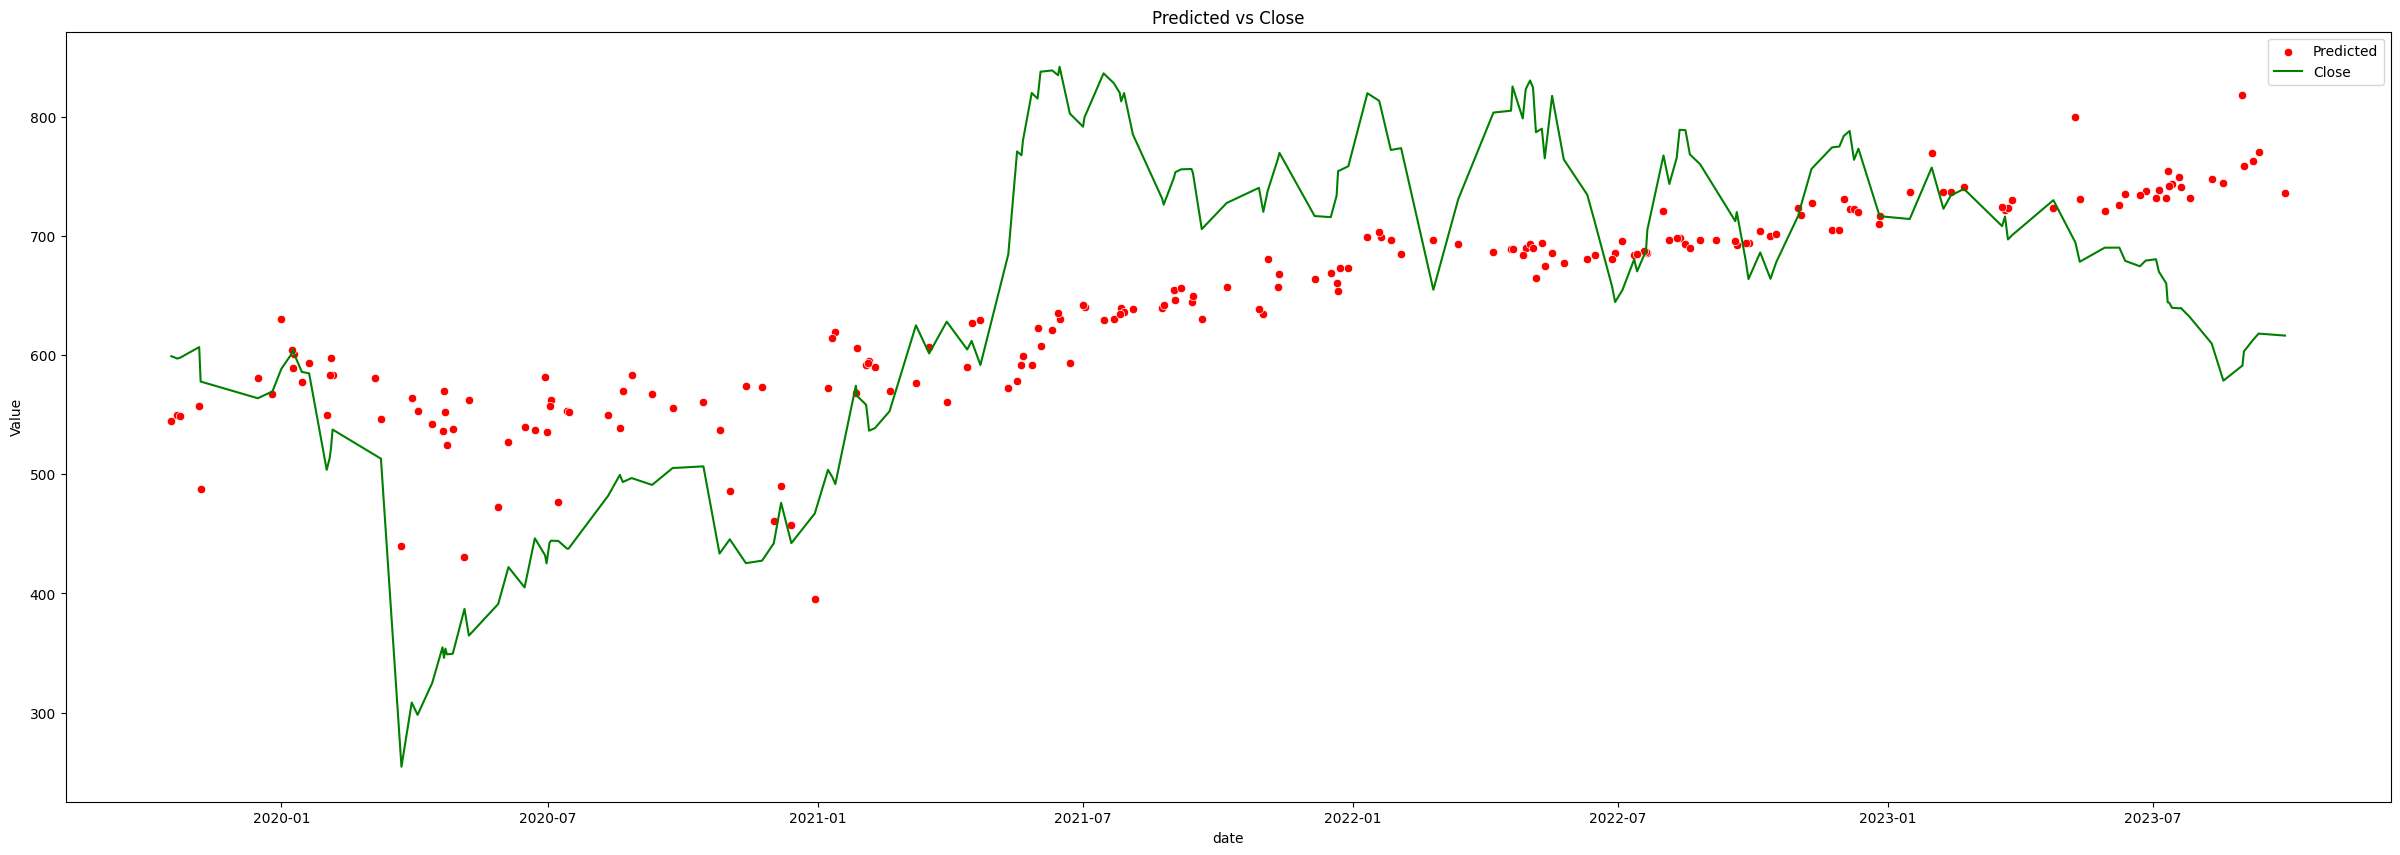

In [49]:
x_test['Close'] = y_test.values
x_test['Predicted'] = pd.Series(y_pred,index=x_test.index)
x_test['date'] = pd.to_datetime(x_test[['Year', 'Month', 'Day']])
y_pred =lr.predict(x_test_poly)

x_test_sorted = x_test.sort_values('date')

plt.figure(figsize=(30, 10))
sns.scatterplot(x = x_test['date'], y = x_test['Predicted'], label='Predicted', color='red')
sns.lineplot(x = x_test['date'],y = x_test['Close'], label='Close',color='green')

plt.legend()
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Predicted vs Close')

plt.show()

In [50]:
x_test['Close'] = y_test.values

In [51]:
x_test

,Volume,Chg%,Year,Month,Day,date,Close,Predicted
48621,2750000.0,-4.35,2020,2,1,2020-02-01,503.65,549.804952
48228,3030000.0,0.63,2021,9,2,2021-09-02,753.35,646.217165
48270,2510000.0,0.99,2021,7,2,2021-07-02,799.35,640.504059
48359,16690000.0,2.17,2021,2,19,2021-02-19,552.80,569.555479
48618,3110000.0,2.84,2020,2,5,2020-02-05,537.45,583.100773
...,...,...,...,...,...,...,...,...
48189,3450000.0,1.41,2021,10,29,2021-10-29,740.20,638.521818
48154,1660000.0,3.58,2021,12,21,2021-12-21,733.65,660.231724
47768,2360000.0,-0.06,2023,7,12,2023-07-12,643.85,742.074025
47844,913310.0,-1.05,2023,3,20,2023-03-20,708.10,723.736622


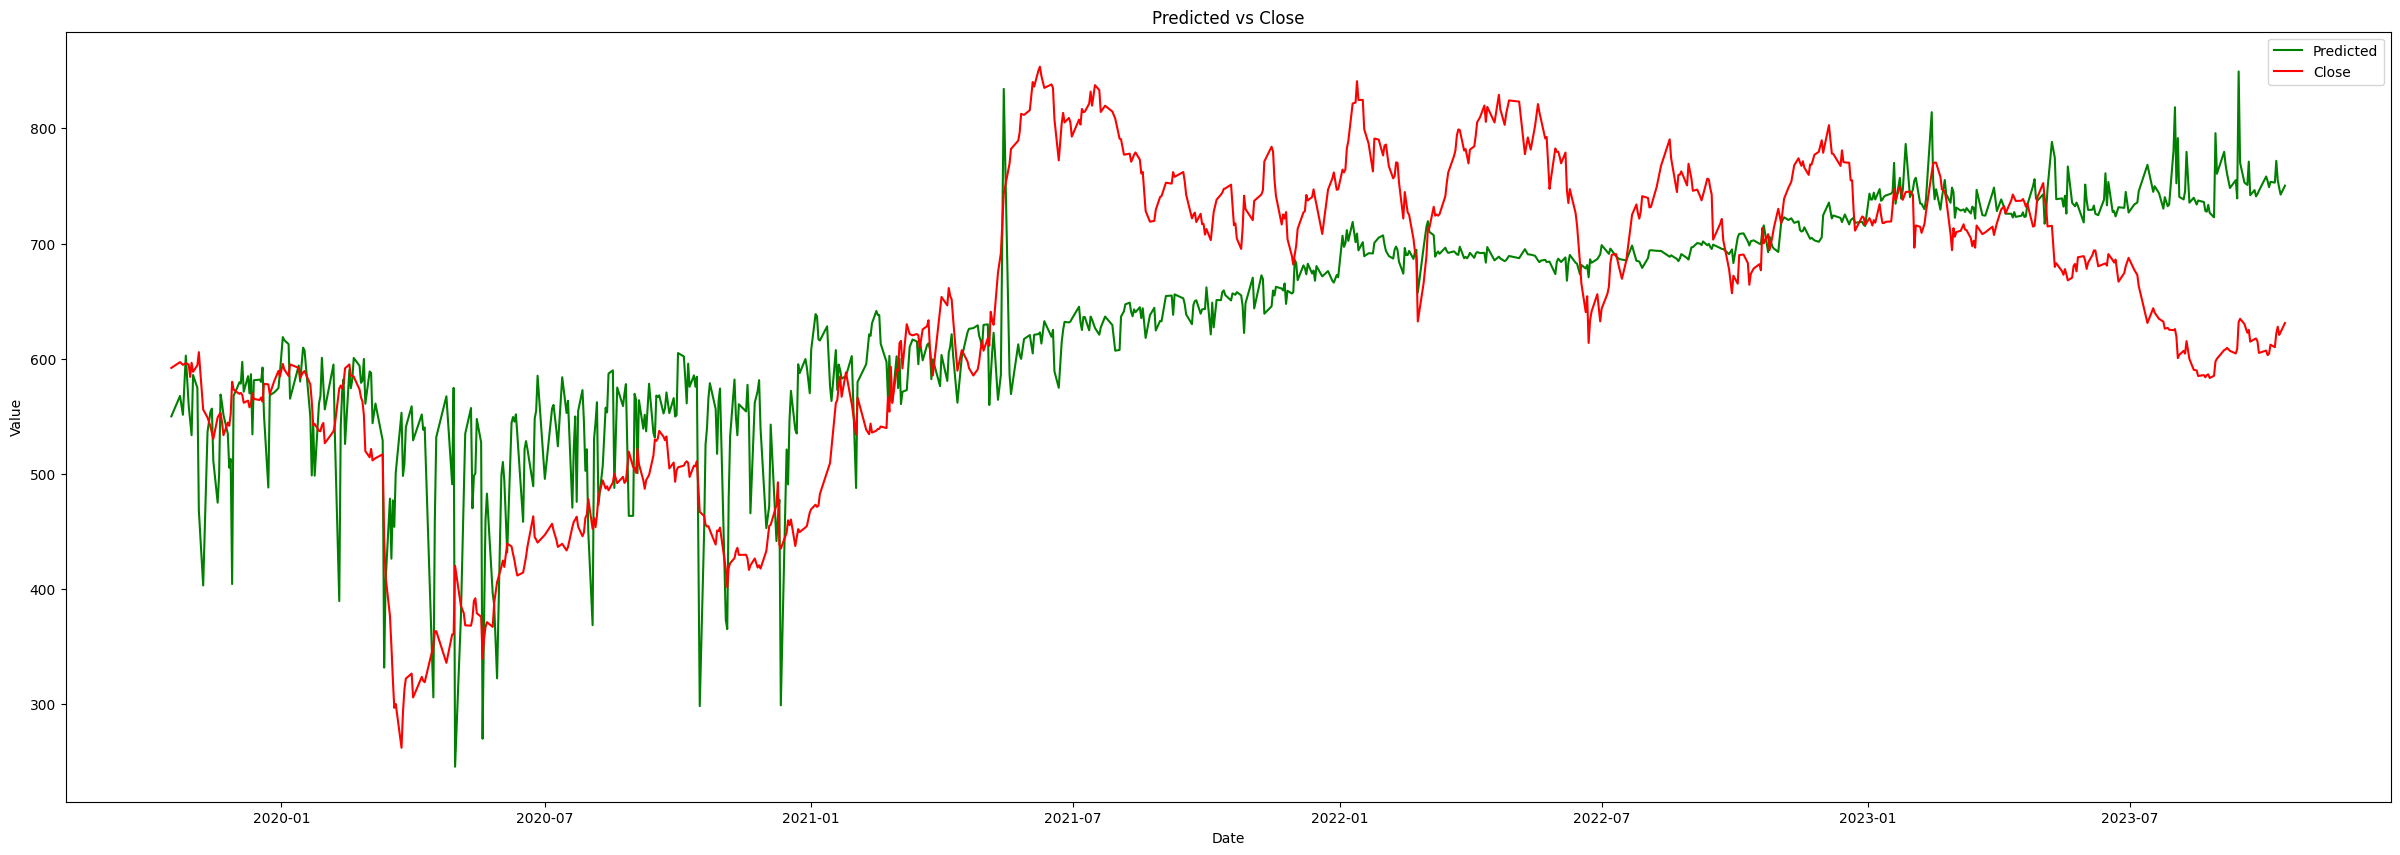

In [52]:
# Final
x_train['Close'] = y_train.values
x_train['Predicted'] = pd.Series(y_predt,index=x_train.index)
x_train['date'] = pd.to_datetime(x_train[['Year', 'Month', 'Day']])
y_predt=lr.predict(x_train_poly)

x_train_sorted = x_train.sort_values('date')

plt.figure(figsize=(30, 10))
plt.plot(x_train_sorted['date'], x_train_sorted['Predicted'], label='Predicted', color='g')
plt.plot(x_train_sorted['date'], x_train_sorted['Close'], label='Close',color='r')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Predicted vs Close')

plt.show()

In [53]:
import gspread

In [54]:
gc = gspread.service_account(filename="V:\Masai School Class\Project 3\key.json")

In [55]:
wks = gc.open('new').sheet1
wks

<Worksheet 'Sheet1' id:0>

In [56]:
# stock_name = 'UPL Ltd.'
# qty = 1
# buying_date = '2023-12-20'
# selling_date = '2024-11-20'


In [60]:
wks.update('F2',[[stock_name],[qty],[buying_date],[selling_date],[],[],[pnl]])

{'spreadsheetId': '177Y_rgaDSJ2HhsB9c3tfTSpHMWa1AIUwZ9n5TOqLPMY',
 'updatedRange': 'Sheet1!F2:F8',
 'updatedRows': 5,
 'updatedColumns': 1,
 'updatedCells': 5}

In [61]:
data['Stock Name'].unique()

array(['Adani Enterprises Ltd.',
       'Adani Ports and Special Economic Zone Ltd.',
       'Apollo Hospitals Enterprises Ltd.', 'Asian Paints Ltd.',
       'Axis Bank Ltd.', 'Bajaj Auto Ltd.', 'Bajaj Finance Ltd.',
       'Bajaj Finserv Ltd.', 'Bharat Petroleum Corp. Ltd.',
       'Bharti Airtel Ltd.', 'Britannia Industries Ltd.', 'Cipla Ltd.',
       'Coal India Ltd.', "Divi's Laboratories Ltd.",
       "Dr. Reddy's Laboratories Ltd.", 'Eicher Motors Ltd.',
       'Grasim Industries Ltd.', 'HCL Technologies Ltd.',
       'HDFC Bank Ltd.', 'HDFC Life Insurance Company Ltd.',
       'Hero MotoCorp Ltd.', 'Hindalco Industries Ltd.',
       'Hindustan Unilever Ltd.', 'ICICI Bank Ltd.', 'IndusInd Bank Ltd.',
       'Infosys Ltd.', 'ITC Ltd.', 'JSW Steel Ltd.',
       'Kotak Mahindra Bank Ltd.', 'Larsen & Toubro Ltd.',
       'LTIMindtree Ltd.', 'Mahindra & Mahindra Ltd.',
       'Maruti Suzuki India Ltd.', 'Nestle India Ltd.', 'NTPC Ltd.',
       'Oil And Natural Gas Corporation Ltd.',
 

{'spreadsheetId': '177Y_rgaDSJ2HhsB9c3tfTSpHMWa1AIUwZ9n5TOqLPMY',
 'updatedRange': 'Sheet1!F2:F4',
 'updatedRows': 3,
 'updatedColumns': 1,
 'updatedCells': 3}

In [62]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from apscheduler.schedulers.background import BackgroundScheduler

# Function to update data from the Google Sheet
def update_google_sheet_data():
    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
    creds = ServiceAccountCredentials.from_json_keyfile_name('your-credentials.json', scope)
    client = gspread.authorize(creds)

    # Replace 'new' with the actual name of your Google Sheet
    sheet = client.open('new').sheet1  # Replace 'new' with your sheet name

    # Get data from the sheet
    data = sheet.get_all_values()
    for row in data:
        print(row)  # You can process the data as needed

# Create a scheduler
scheduler = BackgroundScheduler()
scheduler.add_job(update_google_sheet_data, 'interval', minutes=30)  # Update data every 30 minutes

# Start the scheduler
scheduler.start()

# Keep the script running
try:
    while True:
        pass
except (KeyboardInterrupt, SystemExit):
    # Shut down the scheduler gracefully on keyboard interrupt or system exit
    scheduler.shutdown()

ModuleNotFoundError: No module named 'oauth2client'

In [63]:
client = gspread.authorize(creds)
sheet = client.open('new').sheet1  # Replace 'new' with your sheet name
print(sheet.title) 

NameError: name 'creds' is not defined

In [64]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Initialize credentials
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name('your-credentials.json', scope)
client = gspread.authorize(creds)

# Open the Google Sheet by title
sheet = client.open('new').sheet1  # Replace with your sheet title

# Function to update data from the sheet
def update_data():
    data = sheet.get_all_values()
    for row in data:
        print(row)  # Process the data as needed

# Update data periodically (e.g., every 30 minutes)
from apscheduler.schedulers.blocking import BlockingScheduler
scheduler = BlockingScheduler()
scheduler.add_job(update_data, 'interval', minutes=30)
scheduler.start()

ModuleNotFoundError: No module named 'oauth2client'

In [65]:
import gspread
from google.auth import service_account
from googleapiclient.discovery import build
from google.auth.transport.requests import Request

SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

# Specify the path to your service account JSON key file
creds = service_account.Credentials.from_service_account_file('your-credentials.json', scopes=SCOPES)

# Authenticate with the Google Sheets API
service = build('sheets', 'v4', credentials=creds)

# Open the Google Sheet by its ID
sheet_id = 'new'
sheet = service.spreadsheets()

# Function to update data from the sheet
def update_data():
    result = sheet.values().get(spreadsheetId=sheet_id, range='A1:B2').execute()
    values = result.get('values', [])
    if values:
        for row in values:
            print(row)  # Process the data as needed

# Update data periodically (e.g., every 30 minutes)
from apscheduler.schedulers.blocking import BlockingScheduler
scheduler = BlockingScheduler()
scheduler.add_job(update_data, 'interval', minutes=30)
scheduler.start()

ImportError: cannot import name 'service_account' from 'google.auth' (c:\Users\Vishal Chauhan\AppData\Local\Programs\Python\Python310\lib\site-packages\google\auth\__init__.py)

In [66]:
# pip install gspread oauth2client

     -------------------------------------- 98.2/98.2 KB 935.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Vishal Chauhan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from apscheduler.schedulers.blocking import BlockingScheduler

# Function to update data from the Google Sheet
def update_google_sheet_data():
    # Authenticate with the Google Sheets API
    scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
    creds = ServiceAccountCredentials.from_json_keyfile_name('your-credentials.json', scope)
    client = gspread.authorize(creds)

    # Open the Google Sheet by title
    sheet = client.open('new').sheet1  # Replace with your sheet title

    # Get data from the sheet
    data = sheet.get_all_values()
    for row in data:
        print(row)  # You can process the data as needed

# Create a scheduler to update data periodically (e.g., every 30 minutes)
scheduler = BlockingScheduler()
scheduler.add_job(update_google_sheet_data, 'interval', minutes=30)
scheduler.start()

# Keep the script running
try:
    while True:
        pass
except (KeyboardInterrupt, SystemExit):
    # Shut down the scheduler gracefully on keyboard interrupt or system exit
    scheduler.shutdown()

In [71]:
# pip install apscheduler

     -------------------------------------- 59.3/59.3 KB 629.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Vishal Chauhan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
